### 다중 레이블 Regression

In [2]:
import pandas as pd

EMOTION_LABLES = ["happiness", "angry", "disgust", "fear", "neutral", "sadness", "surprise"]
# EMOTION_LABLES = ["happiness", "angry", "disgust", "fear", "sadness", "surprise"] # neutral 제외
SCORE_LABLES = [emo+"_score" for emo in EMOTION_LABLES]

3개년도 파일 병합

In [3]:
features_df = pd.read_csv("extracted_features_v0.2.csv", index_col="wav_id")

labels_df_01 = pd.read_csv("4th.csv", encoding='cp949').set_index("wav_id")
labels_df_02 = pd.read_csv("5th_1st.csv", encoding='cp949').set_index("wav_id")
labels_df_03 = pd.read_csv("5th_2nd.csv", encoding='cp949').set_index("wav_id")

# 4차 + 5차_1차 + 5차_2차
labels_df = pd.concat([labels_df_01, labels_df_02, labels_df_03])

점수 계산

In [4]:
def score_emotion(row):
    valued_emotions = {emo: 0 for emo in EMOTION_LABLES}
    
    for i in range(1, 6):
        emo_label = row.get(f'{i}번 감정').lower()
        if emo_label == 'neutral': continue

        emo_val = row.get(f'{i}번 감정세기', row.get(f'{i}번감정세기'))
        valued_emotions[emo_label] += emo_val / 10

    return [valued_emotions[emo] for emo in EMOTION_LABLES]

labels_df[SCORE_LABLES] = labels_df.apply(lambda row: pd.Series(score_emotion(row)), axis=1)
labels_df.head()

,발화문,상황,1번 감정,1번 감정세기,2번 감정,2번 감정세기,3번 감정,3번 감정세기,4번 감정,4번 감정세기,...,5번 감정세기,나이,성별,happiness_score,angry_score,disgust_score,fear_score,neutral_score,sadness_score,surprise_score
wav_id,,,,,,,,,,,,,,,,,,,,,
5e258fd1305bcf3ad153a6a4,"어, 청소 니가 대신 해 줘!",anger,Neutral,0,Angry,1,Neutral,0,Neutral,0,...,1,27,male,0.0,0.2,0.0,0.0,0.0,0.0,0.0
5e258fe2305bcf3ad153a6a5,둘 다 청소 하기 싫어. 귀찮아.,anger,Neutral,0,Angry,1,Neutral,0,Neutral,0,...,1,27,male,0.0,0.2,0.0,0.0,0.0,0.0,0.0
5e258ff5305bcf3ad153a6a6,둘 다 하기 싫어서 화내.,anger,Angry,1,Angry,1,Neutral,0,Angry,1,...,1,27,male,0.0,0.4,0.0,0.0,0.0,0.0,0.0
5e25902f305bcf3ad153a6a9,그럼 방세는 어떡해.,anger,Sadness,1,Sadness,1,Sadness,1,Sadness,1,...,1,27,male,0.0,0.0,0.0,0.0,0.0,0.5,0.0
5e27f90b5807b852d9e0157b,권태긴줄 알았는데 다른 사람이 생겼나보더라고.,sad,Sadness,1,Sadness,1,Sadness,1,Sadness,2,...,1,32,male,0.0,0.0,0.0,0.0,0.0,0.6,0.0


메타컬럼 제거

In [5]:
META_COLUMS = [
    "발화문", "상황", "1번 감정", "1번 감정세기", "2번 감정", "2번 감정세기",
    "3번 감정", "3번 감정세기", "4번 감정", "4번 감정세기", "5번 감정", "5번 감정세기",
    "나이", "성별"
]

labels_df = labels_df.drop(columns=META_COLUMS)
labels_df.head()

,happiness_score,angry_score,disgust_score,fear_score,neutral_score,sadness_score,surprise_score
wav_id,,,,,,,
5e258fd1305bcf3ad153a6a4,0.0,0.2,0.0,0.0,0.0,0.0,0.0
5e258fe2305bcf3ad153a6a5,0.0,0.2,0.0,0.0,0.0,0.0,0.0
5e258ff5305bcf3ad153a6a6,0.0,0.4,0.0,0.0,0.0,0.0,0.0
5e25902f305bcf3ad153a6a9,0.0,0.0,0.0,0.0,0.0,0.5,0.0
5e27f90b5807b852d9e0157b,0.0,0.0,0.0,0.0,0.0,0.6,0.0


피처 파일에서 볼륨 데이터 제거

In [6]:
LOUDNESS_COLUMNS = [c for c in features_df.columns if 'loudness' in c.lower()]
features_df = features_df.drop(columns=LOUDNESS_COLUMNS)

print(f'removed {len(LOUDNESS_COLUMNS)} columns')
print(LOUDNESS_COLUMNS[:5])

removed 38 columns
['pcm_loudness_sma_max', 'pcm_loudness_sma_min', 'pcm_loudness_sma_range', 'pcm_loudness_sma_maxPos', 'pcm_loudness_sma_minPos']


피처 파일에서 특수기호 제거

In [7]:
def clean_columns(col):
    return col.replace('[', '_').replace(']', '').replace('<', '_')

features_df.columns = [clean_columns(col) for col in features_df.columns]
features_df.head()

,pcm_intensity_sma_max,pcm_intensity_sma_min,pcm_intensity_sma_range,pcm_intensity_sma_maxPos,pcm_intensity_sma_minPos,pcm_intensity_sma_amean,pcm_intensity_sma_linregc1,pcm_intensity_sma_linregc2,pcm_intensity_sma_linregerrA,pcm_intensity_sma_linregerrQ,...,F0env_sma_de_linregerrQ,F0env_sma_de_stddev,F0env_sma_de_skewness,F0env_sma_de_kurtosis,F0env_sma_de_quartile1,F0env_sma_de_quartile2,F0env_sma_de_quartile3,F0env_sma_de_iqr1-2,F0env_sma_de_iqr2-3,F0env_sma_de_iqr1-3
wav_id,,,,,,,,,,,,,,,,,,,,,
5e258fd1305bcf3ad153a6a4,2.592392e-07,0.0,2.592392e-07,28.0,0.0,3.462342e-08,-2.195436e-10,6.996994e-08,2.206284e-08,1.110736e-15,...,68.07635,8.341203,2.874979,19.054754,-1.162051,0.012518,3.178476,1.174570,3.165958,4.340528
5e258fe2305bcf3ad153a6a5,1.436943e-07,0.0,1.436943e-07,59.0,0.0,2.807357e-08,-8.333632e-11,4.115737e-08,2.135804e-08,8.103691e-16,...,109.55907,10.498592,1.641979,10.047668,-4.297239,0.000000,5.946875,4.297239,5.946875,10.244114
5e258ff5305bcf3ad153a6a6,2.645968e-07,0.0,2.645968e-07,132.0,0.0,2.765471e-08,-2.840646e-11,3.241280e-08,2.263397e-08,1.148836e-15,...,90.33827,9.569824,0.621378,5.098198,-3.372910,0.000000,5.525393,3.372910,5.525393,8.898302
5e25902f305bcf3ad153a6a9,2.422563e-07,0.0,2.422563e-07,127.0,0.0,3.293097e-08,-5.346202e-11,4.132451e-08,2.574871e-08,1.487964e-15,...,75.46028,8.815373,1.018880,6.957049,-2.294756,0.000000,3.532836,2.294756,3.532836,5.827592
5e27ec9f5807b852d9e01542,1.468382e-08,0.0,1.468382e-08,88.0,0.0,1.369371e-09,-9.951729e-13,1.525613e-09,8.970344e-10,2.465537e-18,...,40.28366,6.452733,3.258206,21.836330,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


wav_id로 조인

In [8]:
data = features_df.join(labels_df, how='inner')
data.head()

,pcm_intensity_sma_max,pcm_intensity_sma_min,pcm_intensity_sma_range,pcm_intensity_sma_maxPos,pcm_intensity_sma_minPos,pcm_intensity_sma_amean,pcm_intensity_sma_linregc1,pcm_intensity_sma_linregc2,pcm_intensity_sma_linregerrA,pcm_intensity_sma_linregerrQ,...,F0env_sma_de_iqr1-2,F0env_sma_de_iqr2-3,F0env_sma_de_iqr1-3,happiness_score,angry_score,disgust_score,fear_score,neutral_score,sadness_score,surprise_score
wav_id,,,,,,,,,,,,,,,,,,,,,
5e258fd1305bcf3ad153a6a4,2.592392e-07,0.0,2.592392e-07,28.0,0.0,3.462342e-08,-2.195436e-10,6.996994e-08,2.206284e-08,1.110736e-15,...,1.174570,3.165958,4.340528,0.0,0.2,0.0,0.0,0.0,0.0,0.0
5e258fe2305bcf3ad153a6a5,1.436943e-07,0.0,1.436943e-07,59.0,0.0,2.807357e-08,-8.333632e-11,4.115737e-08,2.135804e-08,8.103691e-16,...,4.297239,5.946875,10.244114,0.0,0.2,0.0,0.0,0.0,0.0,0.0
5e258ff5305bcf3ad153a6a6,2.645968e-07,0.0,2.645968e-07,132.0,0.0,2.765471e-08,-2.840646e-11,3.241280e-08,2.263397e-08,1.148836e-15,...,3.372910,5.525393,8.898302,0.0,0.4,0.0,0.0,0.0,0.0,0.0
5e25902f305bcf3ad153a6a9,2.422563e-07,0.0,2.422563e-07,127.0,0.0,3.293097e-08,-5.346202e-11,4.132451e-08,2.574871e-08,1.487964e-15,...,2.294756,3.532836,5.827592,0.0,0.0,0.0,0.0,0.0,0.5,0.0
5e27ec9f5807b852d9e01542,1.468382e-08,0.0,1.468382e-08,88.0,0.0,1.369371e-09,-9.951729e-13,1.525613e-09,8.970344e-10,2.465537e-18,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.5,0.0


X, y 분리

In [9]:
X = data[features_df.columns]
y = data[SCORE_LABLES]

X.head()


,pcm_intensity_sma_max,pcm_intensity_sma_min,pcm_intensity_sma_range,pcm_intensity_sma_maxPos,pcm_intensity_sma_minPos,pcm_intensity_sma_amean,pcm_intensity_sma_linregc1,pcm_intensity_sma_linregc2,pcm_intensity_sma_linregerrA,pcm_intensity_sma_linregerrQ,...,F0env_sma_de_linregerrQ,F0env_sma_de_stddev,F0env_sma_de_skewness,F0env_sma_de_kurtosis,F0env_sma_de_quartile1,F0env_sma_de_quartile2,F0env_sma_de_quartile3,F0env_sma_de_iqr1-2,F0env_sma_de_iqr2-3,F0env_sma_de_iqr1-3
wav_id,,,,,,,,,,,,,,,,,,,,,
5e258fd1305bcf3ad153a6a4,2.592392e-07,0.0,2.592392e-07,28.0,0.0,3.462342e-08,-2.195436e-10,6.996994e-08,2.206284e-08,1.110736e-15,...,68.07635,8.341203,2.874979,19.054754,-1.162051,0.012518,3.178476,1.174570,3.165958,4.340528
5e258fe2305bcf3ad153a6a5,1.436943e-07,0.0,1.436943e-07,59.0,0.0,2.807357e-08,-8.333632e-11,4.115737e-08,2.135804e-08,8.103691e-16,...,109.55907,10.498592,1.641979,10.047668,-4.297239,0.000000,5.946875,4.297239,5.946875,10.244114
5e258ff5305bcf3ad153a6a6,2.645968e-07,0.0,2.645968e-07,132.0,0.0,2.765471e-08,-2.840646e-11,3.241280e-08,2.263397e-08,1.148836e-15,...,90.33827,9.569824,0.621378,5.098198,-3.372910,0.000000,5.525393,3.372910,5.525393,8.898302
5e25902f305bcf3ad153a6a9,2.422563e-07,0.0,2.422563e-07,127.0,0.0,3.293097e-08,-5.346202e-11,4.132451e-08,2.574871e-08,1.487964e-15,...,75.46028,8.815373,1.018880,6.957049,-2.294756,0.000000,3.532836,2.294756,3.532836,5.827592
5e27ec9f5807b852d9e01542,1.468382e-08,0.0,1.468382e-08,88.0,0.0,1.369371e-09,-9.951729e-13,1.525613e-09,8.970344e-10,2.465537e-18,...,40.28366,6.452733,3.258206,21.836330,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [10]:
y.head()

,happiness_score,angry_score,disgust_score,fear_score,neutral_score,sadness_score,surprise_score
wav_id,,,,,,,
5e258fd1305bcf3ad153a6a4,0.0,0.2,0.0,0.0,0.0,0.0,0.0
5e258fe2305bcf3ad153a6a5,0.0,0.2,0.0,0.0,0.0,0.0,0.0
5e258ff5305bcf3ad153a6a6,0.0,0.4,0.0,0.0,0.0,0.0,0.0
5e25902f305bcf3ad153a6a9,0.0,0.0,0.0,0.0,0.0,0.5,0.0
5e27ec9f5807b852d9e01542,0.0,0.0,0.0,0.0,0.0,0.5,0.0


학습셋, 테스트셋 분리(8:2)

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
y_train.head()

,happiness_score,angry_score,disgust_score,fear_score,neutral_score,sadness_score,surprise_score
wav_id,,,,,,,
5e377cf47995ef170fc0ef07,0.0,0.0,0.0,0.0,0.0,0.8,0.0
5eceb2279aa8ea0eec53ef77,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5e37a91905fef317e874be31,0.0,0.6,0.0,0.0,0.0,0.2,0.0
5f007caf704f492ee125615f,0.0,0.0,0.0,0.0,0.0,0.6,0.0
5fbb3285576e9378b67ac9c8,0.0,0.0,0.0,0.0,0.0,0.0,0.0


가중치

In [13]:
from sklearn.utils.class_weight import compute_sample_weight

# 1) dominant emotion (가장 높은 score) 를 1D 시리즈로
dominant = y_train.idxmax(axis=1)  

# 2) compute_sample_weight 적용
sample_weights = compute_sample_weight(
    class_weight="balanced",
    y=dominant
)
print(sample_weights)

[0.3755177  0.77047744 0.77047744 ... 5.12529138 0.3755177  0.3755177 ]


In [21]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.utils.class_weight import compute_sample_weight
from xgboost import XGBRegressor
from sklearn.multioutput import MultiOutputRegressor
import numpy as np

# 1) KFold 설정
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mse_list = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X), 1):
    # 2) train/val 분할
    X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_tr, y_val = y.iloc[train_idx], y.iloc[val_idx]
    
    # 3) 이 fold 전용 sample_weight 계산 (dominant emotion 기준)
    dominant_tr = y_tr.idxmax(axis=1)
    w_tr = compute_sample_weight('balanced', dominant_tr)
    
    # 4) 모델 정의 & 학습 (GPU 옵션 그대로)
    base = XGBRegressor(
        n_estimators=400,
        max_depth=6,
        learning_rate=0.05,
        subsample=0.9,
        colsample_bytree=0.9,
        random_state=42,
        tree_method='hist',
        device='cuda',
    )
    multi = MultiOutputRegressor(base)
    multi.fit(X_tr, y_tr, sample_weight=w_tr)
    
    # 5) 검증셋 예측 & MSE 계산
    y_pred = multi.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    mse_list.append(mse)
    print(f"Fold {fold} MSE: {mse:.4f}")
    print(f"Fold {fold} weight mean: {w_tr.mean():.3f}, std: {w_tr.std():.3f}")


# 6) 최종 평균·표준편차
print(f"\n5-fold CV MSE: {np.mean(mse_list):.4f} ± {np.std(mse_list):.4f}")


Fold 1 MSE: 0.0235
Fold 1 weight mean: 1.000, std: 0.980
Fold 2 MSE: 0.0231
Fold 2 weight mean: 1.000, std: 0.983
Fold 3 MSE: 0.0224
Fold 3 weight mean: 1.000, std: 0.972
Fold 4 MSE: 0.0228
Fold 4 weight mean: 1.000, std: 0.970
Fold 5 MSE: 0.0231
Fold 5 weight mean: 1.000, std: 0.971

5-fold CV MSE: 0.0230 ± 0.0004


In [22]:
from sklearn.metrics import mean_absolute_error, r2_score

for idx, emo in enumerate(y.columns):
    mse  = mean_squared_error(y_test.iloc[:, idx], y_pred[:, idx])
    rmse = mse ** 0.5
    mae  = mean_absolute_error(y_test.iloc[:, idx], y_pred[:, idx])
    r2   = r2_score(y_test.iloc[:, idx], y_pred[:, idx])
    
    print(f"--- {emo} ---")
    print(f"MSE : {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE : {mae:.4f}")
    print(f"R²  : {r2:.4f}\n")

--- happiness_score ---
MSE : 0.0312
RMSE: 0.1767
MAE : 0.1026
R²  : -0.1817

--- angry_score ---
MSE : 0.0541
RMSE: 0.2325
MAE : 0.1661
R²  : -0.1000

--- disgust_score ---
MSE : 0.0243
RMSE: 0.1560
MAE : 0.0992
R²  : -0.1539

--- fear_score ---
MSE : 0.0237
RMSE: 0.1539
MAE : 0.0991
R²  : -0.1963

--- neutral_score ---
MSE : 0.0000
RMSE: 0.0000
MAE : 0.0000
R²  : 1.0000

--- sadness_score ---
MSE : 0.0886
RMSE: 0.2977
MAE : 0.2334
R²  : -0.2009

--- surprise_score ---
MSE : 0.0091
RMSE: 0.0954
MAE : 0.0512
R²  : -0.2600



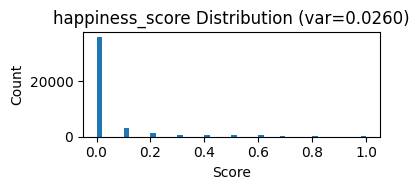

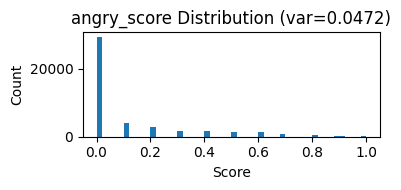

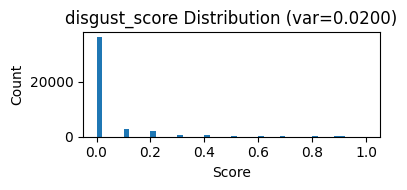

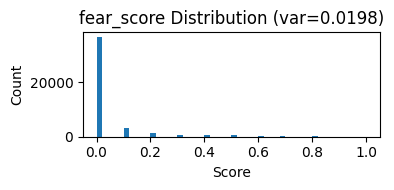

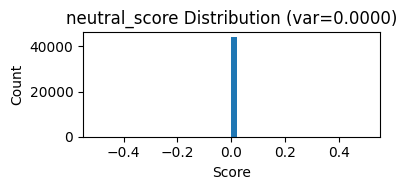

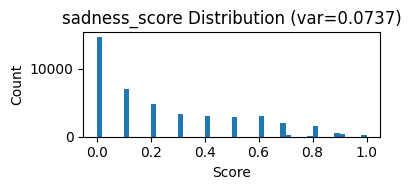

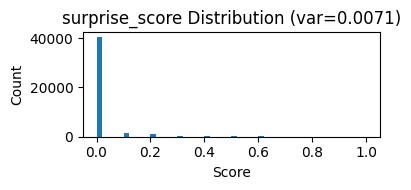

In [ ]:
import matplotlib.pyplot as plt

for col in y.columns:
    plt.figure(figsize=(4,2))
    plt.hist(y[col], bins=50)
    plt.title(f"{col} Distribution (var={y[col].var():.4f})")
    plt.xlabel("Score")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()


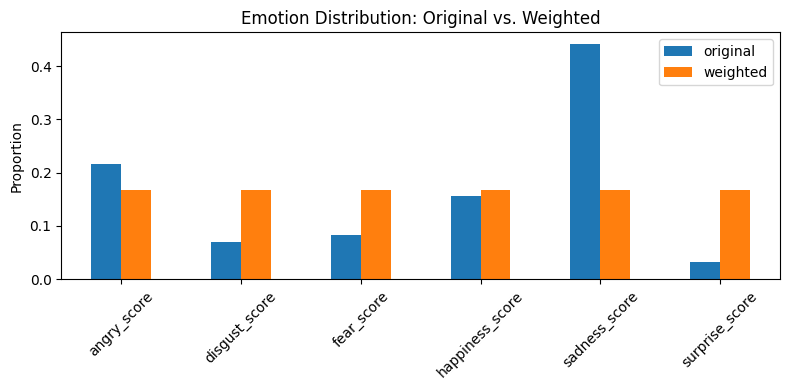

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_sample_weight

# 1) dominant emotion (가장 높은 score) 시리즈
dominant = y.idxmax(axis=1)

# 2) sample_weight (balanced) 계산
sample_weights = compute_sample_weight('balanced', dominant)

# 3) 원래 분포
orig_dist = dominant.value_counts(normalize=True)

# 4) 가중 분포 구하기 (index=dominant 지정!)
weighted_counts = pd.Series(sample_weights, index=dominant).groupby(level=0).sum()
weighted_dist = weighted_counts / weighted_counts.sum()

# 5) 합쳐서 DataFrame으로
df_dist = pd.DataFrame({
    'original': orig_dist,
    'weighted': weighted_dist
})

# 6) 시각화
df_dist.plot.bar(rot=45, figsize=(8,4))
plt.ylabel('Proportion')
plt.title('Emotion Distribution: Original vs. Weighted')
plt.tight_layout()
plt.show()
